## Importing and adjusting the dataset ##

In [293]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import dates as mpl_dates

In [294]:
#use df as basis to start all exploration
data = pd.read_csv(r"C:\Users\letru\Documents\Flatiron\Phase-3-Project\dsc-phase-3-project/Terry-Ohio_Stops.csv", parse_dates = ['date'],
                  index_col = 'date', dtype = {'officer_race':'category','officer_gender':'category',
                                                'subject_age':'category',
                                                'subject_race':'category','subject_gender': 'category',
                                                'stop_resolution': 'category','weapon_type':'category',
                                                'call_type':'category','arrest':'int32', 'frisk':'float',
                                                'precinct':'category', 'sector':'category', 'beat': 'category'})
data.sort_index(inplace = True)
data['count'] = 1
data

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,count
date,,,,,,,,,,,,,,,,,,,,,
2015-03-15,17-Jan,-1,2.020000e+13,28020,Referred for Prosecution,Lethal Cutting Instrument,4585,1955,M,Hispanic or Latino,...,-,-,-,NaN,N,Y,East,G,G2,1
2015-03-16,18 - 25,-1,2.010000e+13,305901,Arrest,None,7661,1984,M,White,...,-,-,-,NaN,N,N,West,M,M3,1
2015-03-16,18 - 25,-1,2.020000e+13,28093,Field Contact,None,7634,1977,M,White,...,-,-,-,NaN,N,N,-,-,-,1
2015-03-16,36 - 45,-1,2.020000e+13,28092,Field Contact,None,7634,1977,M,White,...,-,-,-,NaN,N,N,-,-,-,1
2015-03-17,26 - 35,-1,2.020000e+13,28755,Offense Report,None,7429,1984,M,White,...,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),#NAME?,911,NaN,N,N,East,G,G3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18,46 - 55,7739808507,2.020000e+13,25603848346,Arrest,-,7722,1989,M,White,...,FIGHT - IP - PHYSICAL (NO WEAPONS),#NAME?,911,WEST PCT 2ND W - MARY,Y,N,West,D,D2,1
2021-06-18,36 - 45,7727013190,2.020000e+13,25603571028,Arrest,-,7766,1984,M,White,...,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),#NAME?,"TELEPHONE OTHER, NOT 911",WEST PCT 2ND W - DAVID BEATS,Y,N,West,M,M1,1
2021-06-18,18 - 25,7728717651,2.020000e+13,25603965158,Arrest,-,7722,1989,M,White,...,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),#NAME?,ONVIEW,WEST PCT 2ND W - MARY,Y,N,West,M,M2,1


In [297]:
new_df = data.copy()
new_df.reset_index(inplace=True)

This data was is based in Seattle from 2015 - present.

In [298]:
new_df = df[['Subject Age Group', 'Subject ID', 'Stop Resolution',
         'Weapon Type', 'Officer ID', 'Officer YOB', 
         'Officer Gender', 'Officer Race', 'Subject Perceived Race', 
         'Subject Perceived Gender', 'Reported Date', 'Initial Call Type','Call Type',
         'Officer Squad', 'Arrest Flag', 'Frisk Flag',
         'Precinct', 'Sector', 'Beat' ]]

In [299]:
new_df.columns = ['subject_age', 'subject_id', 'stop_resolution',
         'weapon_type', 'officer_id', 'officer_age', 
         'officer_gender', 'officer_race', 'subject_race',
         'subject_gender', 'date', 'initial_call_type', 'call_type',
         'officer_squad', 'arrest', 'frisk',
         'precinct', 'sector', 'beat' ]

In [300]:
new_df = new_df.astype({'subject_age': 'category', 'officer_gender':'category', 
                'officer_race': 'category', 'subject_race':'category', 
                'subject_gender':'category', 'date':'datetime64','arrest':'category', 
                'frisk':'category','precinct':'category', 'sector':'category',
                'beat': 'category'})
new_df['count']=1
new_df.replace('-', np.nan, inplace = True)

In [301]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47996 entries, 0 to 47995
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   subject_age        46433 non-null  category      
 1   subject_id         47996 non-null  int64         
 2   stop_resolution    47996 non-null  object        
 3   weapon_type        35428 non-null  object        
 4   officer_id         47972 non-null  object        
 5   officer_age        47996 non-null  int64         
 6   officer_gender     47996 non-null  category      
 7   officer_race       47996 non-null  category      
 8   subject_race       46146 non-null  category      
 9   subject_gender     47761 non-null  category      
 10  date               47996 non-null  datetime64[ns]
 11  initial_call_type  34792 non-null  object        
 12  call_type          34792 non-null  object        
 13  officer_squad      47391 non-null  object        
 14  arrest

## Exploring the data

In [302]:
date = data.copy()
date = date.loc['2015-03':'2021-07']
date = date['count'].resample('M').count()

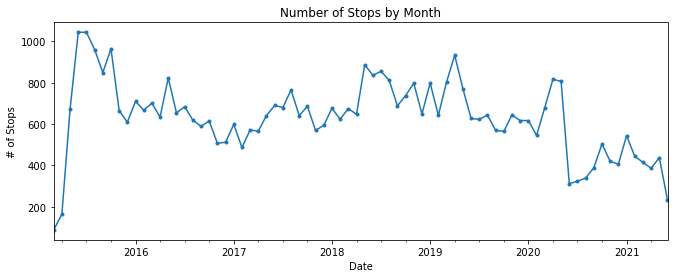

In [303]:
date.plot( marker = '.', linestyle = None, figsize = (11,4))
_=plt.title('Number of Stops by Month')
_=plt.xlabel('Date')
_=plt.ylabel('# of Stops')

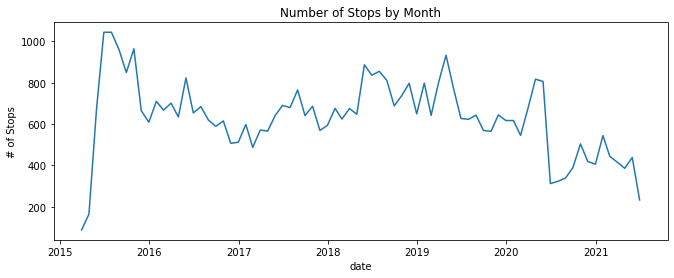

In [304]:
plt.figure(figsize=(11, 4))
ax = sns.lineplot(data = date)
years = mdates.AutoDateLocator()
fmt = mdates.AutoDateFormatter(years)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(fmt)
_=plt.title('Number of Stops by Month')
_=plt.ylabel('# of Stops')
plt.show()

C:\Users\letru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


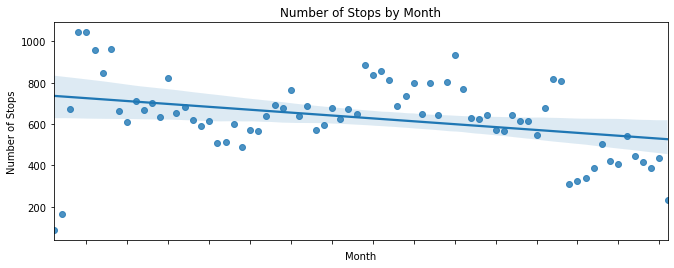

In [305]:
#import ticker to help with date visualization formatting
import matplotlib.ticker as ticker

# set x and y values for the seaborn plot
y = date.values
x = np.linspace(1, len(y), num = len(y))

plt.figure(figsize=(11, 4))
ax = plt.subplot(1,1,1)
p = sns.regplot(x , y)

#format x axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
dates = pd.date_range(start= '2014-10-31', end = df.index[-1], freq = '5M')
dates = [d.strftime('%Y-%m') for d in dates]
ax = ax.set_xticklabels(dates)


_= plt.title('Number of Stops by Month')
_= plt.xlabel('Month')
_= plt.ylabel('Number of Stops')

<AxesSubplot:xlabel='date', ylabel='count'>

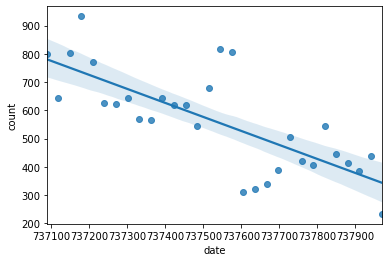

In [306]:
post_covid = pd.DataFrame(date[date.index > '2019'])
post_covid.reset_index(inplace=True)
post_covid['date'] = pd.to_datetime(post_covid['date'])
post_covid['date'] = post_covid['date'].map(dt.datetime.toordinal)
sns.regplot(x="date", y="count", data=post_covid)

In [307]:
dates = [
    datetime(2019, 1, 31),
    datetime(2019, 2, 28),
    datetime(2019, 3, 31),
    datetime(2019, 4, 30),
    datetime(2019, 5, 31),
    datetime(2019, 6, 30),
    datetime(2019, 7, 31),
    datetime(2019, 8, 31),
    datetime(2019, 9, 30),
    datetime(2019, 10, 31),
    datetime(2019, 11, 30),
    datetime(2019, 12, 31),
    datetime(2020, 1, 31),
    datetime(2020, 2, 29),
    datetime(2020, 3, 31),
    datetime(2020, 4, 30),
    datetime(2020, 5, 31),
    datetime(2020, 6, 30),
    datetime(2020, 7, 31),
    datetime(2020, 8, 31),
    datetime(2020, 9, 30),
    datetime(2020, 10, 31),
    datetime(2020, 11, 30),
    datetime(2020, 12, 31),
    datetime(2021, 1, 31),
    datetime(2021, 2, 28),
    datetime(2021, 3, 31),
    datetime(2021, 4, 30),
    datetime(2021, 5, 31),
    datetime(2021, 6, 30)
]

y = [798, 642, 803, 933, 771, 627, 623, 643, 569, 565, 644, 617, 614, 545, 679, 817, 806, 312, 323, 339,
     389, 504, 419, 406, 544, 444, 415, 386, 438, 233]

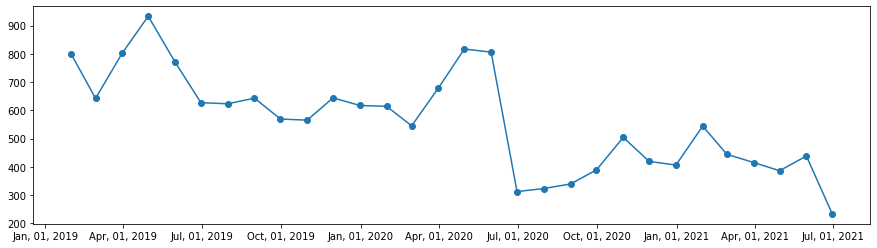

In [308]:
plt.figure(figsize=(15, 4))
plt.plot_date(dates, y, linestyle = 'solid')
date_format = mpl_dates.DateFormatter('%b, %d, %Y')
plt.gca().xaxis.set_major_formatter(date_format);

- Based on this data, the number of terry stops has been progressively decreasing since 2015.

In [309]:
#Looking at race of the subject.
new_df.subject_race.value_counts(ascending = False, dropna = False)

White                                        23452
Black or African American                    14304
Unknown                                       2735
NaN                                           1850
Hispanic                                      1684
Asian                                         1570
American Indian or Alaska Native              1375
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       65
Name: subject_race, dtype: int64

- Total: 46,146 races counted.
    * White subjects accounted for 51% of terry stops.
    * Black subjects accounted for 31% of terry stops.
    * Unknowns and NAN accounted for 10%.
        - It is worth mentioning here that there are ~4500 subjects of unidentified race.

In [310]:
#Looking at race of officers.
new_df.officer_race.value_counts(ascending = False, dropna = False)

White                            36171
Hispanic or Latino                2798
Two or More Races                 2726
Asian                             2079
Black or African American         1918
Not Specified                     1493
Nat Hawaiian/Oth Pac Islander      458
American Indian/Alaska Native      318
Unknown                             35
Name: officer_race, dtype: int64

In [311]:
#age of subject
new_df.subject_age.value_counts(dropna = False)

26 - 35         15984
36 - 45         10240
18 - 25          9576
46 - 55          6212
56 and Above     2439
17-Jan           1982
NaN              1563
Name: subject_age, dtype: int64

In [317]:
race = new_df.copy()

In [318]:
race['subject_race'].unique()

[NaN, 'White', 'Asian', 'Black or African American', 'Other', 'Unknown', 'American Indian or Alaska Native', 'Hispanic', 'Multi-Racial', 'Native Hawaiian or Other Pacific Islander']
Categories (9, object): ['White', 'Asian', 'Black or African American', 'Other', ..., 'American Indian or Alaska Native', 'Hispanic', 'Multi-Racial', 'Native Hawaiian or Other Pacific Islander']

In [316]:
tmp = data[['subject_race','count']]
tmp = tmp.groupby('subject_race').count()
tmp['stop_pct'] = tmp['count'] / tmp['count'].sum()
tmp.drop(['count'], axis = 1, inplace = True)

#create dataframe with census data information & join with main information
census_data = pd.DataFrame(index = tmp.index, data = {'census_pct' : [.04,.137,.077,.066,.044,.002,np.nan,.663,]} )
tmp = tmp.join(census_data)
tmp = tmp[tmp.index != 'Unknown']


#plot the data
ax = tmp.plot(kind = 'bar', figsize = (14,6))

#display the values over the corresoponding bar graphs
for i, v in enumerate(tmp.stop_pct):
    ax.text(i-.24, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )

for i, v in enumerate(tmp.census_pct):
    ax.text(i+.02, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )
    
    


_=plt.xticks(rotation = 45)
_=plt.title('Census Demographics & Terry Stop Racial Comparison: 2015-04 - 2019-05', fontsize = 20)
_=plt.xlabel('Race', fontsize = 14)
_=plt.ylabel('Percentage of Stops', fontsize = 14)
_=plt.legend(loc = 'best', labels = ['Percentage of Total Terry Stops', 'Census Population Percentage'] )
plt.show()



tmp['diff'] = tmp.stop_pct - tmp.census_pct
tmp['diff'].plot(kind = 'bar', figsize = (14,6))
_=plt.xlabel('Subject Race', fontsize = 14)
_=plt.ylabel('Percentage Points', fontsize = 14)
_=plt.title('Difference in Census Demographic & Terry Stop Race Proportions: 2015-04 - 2019-05', fontsize = 20)
_=plt.xticks(rotation = 45)
plt.show()


KeyError: "['subject_race'] not in index"

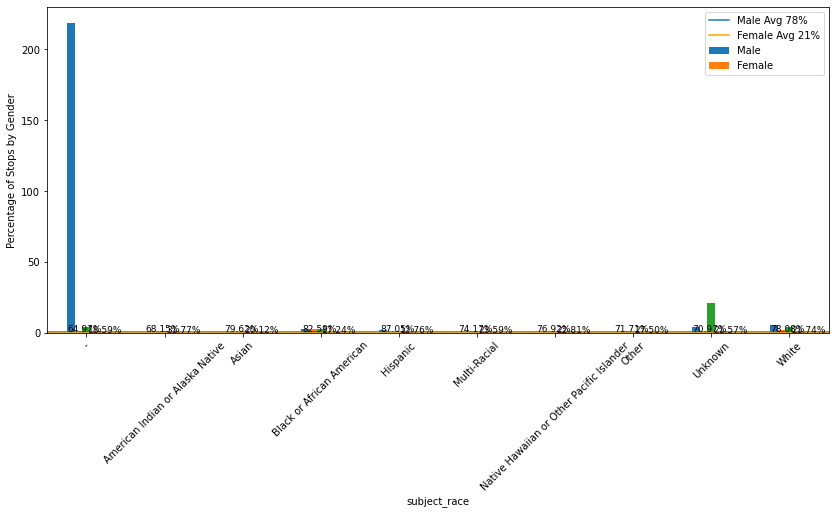

In [19]:
#subset the data & transform with pivot
tmp = new_df[['subject_gender', 'subject_race','count']]
tmp = tmp.groupby(['subject_race','subject_gender']).count()
tmp = tmp.pivot_table(index = 'subject_race', columns = 'subject_gender', values = 'count')

#add a new categories for additional columns
tmp.columns = tmp.columns.add_categories(['pct_male'])
tmp.columns = tmp.columns.add_categories(['pct_female'])

#add new columns with the percentage of male & female
tmp['pct_male'] = tmp.Male / tmp.sum(axis =1)
tmp['pct_female'] = tmp.Female / tmp.sum(axis =1)

male_avg = tmp.Male.sum(axis = 0) / (tmp.Male.sum(axis = 0) + 
                                     tmp.Female.sum(axis = 0) + 
                                     tmp['Unable to Determine'].sum(axis = 0))

female_avg = tmp.Female.sum(axis = 0) / (tmp.Male.sum(axis = 0) + 
                                     tmp.Female.sum(axis = 0) + 
                                     tmp['Unable to Determine'].sum(axis = 0))

tmp.drop(['Female', 'Male', 'Unable to Determine'], axis = 1, inplace = True) #drop original gender data


#plot the data
ax = tmp.plot(kind = 'bar',figsize = (14,6) )

#generate & plot the text value over each bar in the graph
for i, v in enumerate(tmp.pct_male):
    ax.text(i-.24, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )

for i, v in enumerate(tmp.pct_female):
    ax.text(i+.02, v+.02, '{:.2f}%'.format(100*v),fontsize = 9 )

_=plt.xticks(rotation = 45)
_=plt.axhline(male_avg)
_=plt.axhline(female_avg, color = 'orange', )

#_=plt.title('Terry Stops by Gender')
#_=plt.xlabel('Race')
_=plt.ylabel('Percentage of Stops by Gender')
_=plt.legend(loc = 'best', labels = ['Male Avg 78%','Female Avg 21%','Male', 'Female'] )